##### Lecture 16: Boundary Value and Eigenvalue Problems

##### 1-D Temperature BVP: C&C Example 27.3

$$\frac{d^2 T}{dx^2} + K(T_a - T) = 0,   \space\space\space T(0)=T_0, T(L)=T_L$$

- `K`: heat transfer coefficient = 0.01 m-2 
- `Ta`: ambient temperature = 20°C 
- `T0`: left boundary = 40°C 
- `TL`: right boundary = 200°C 
- `L`: length = 10 m

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
T0 = 40 # left BC, deg C
TL = 200 # right BC, deg C
K = 0.01 # m^-2
Ta = 20 # ambient temp
L = 10 # m
n = 7 # number of internal nodes
dx = L / (n+1)

In [3]:
# set up system of equations and solve
main = (2 + K*dx**2) * np.ones(n) # main diagonal
off1 = -1 * np.ones(n-1) # off-diagonals have n-1 elements
A = np.diag(main) + np.diag(off1,-1) + np.diag(off1, 1)
print(A)

[[ 2.015625 -1.        0.        0.        0.        0.        0.      ]
 [-1.        2.015625 -1.        0.        0.        0.        0.      ]
 [ 0.       -1.        2.015625 -1.        0.        0.        0.      ]
 [ 0.        0.       -1.        2.015625 -1.        0.        0.      ]
 [ 0.        0.        0.       -1.        2.015625 -1.        0.      ]
 [ 0.        0.        0.        0.       -1.        2.015625 -1.      ]
 [ 0.        0.        0.        0.        0.       -1.        2.015625]]


In [4]:
# RHS vector
b = K*dx**2*Ta * np.ones(n)
b[0] += T0 # add BCs to first and last element
b[-1] += TL

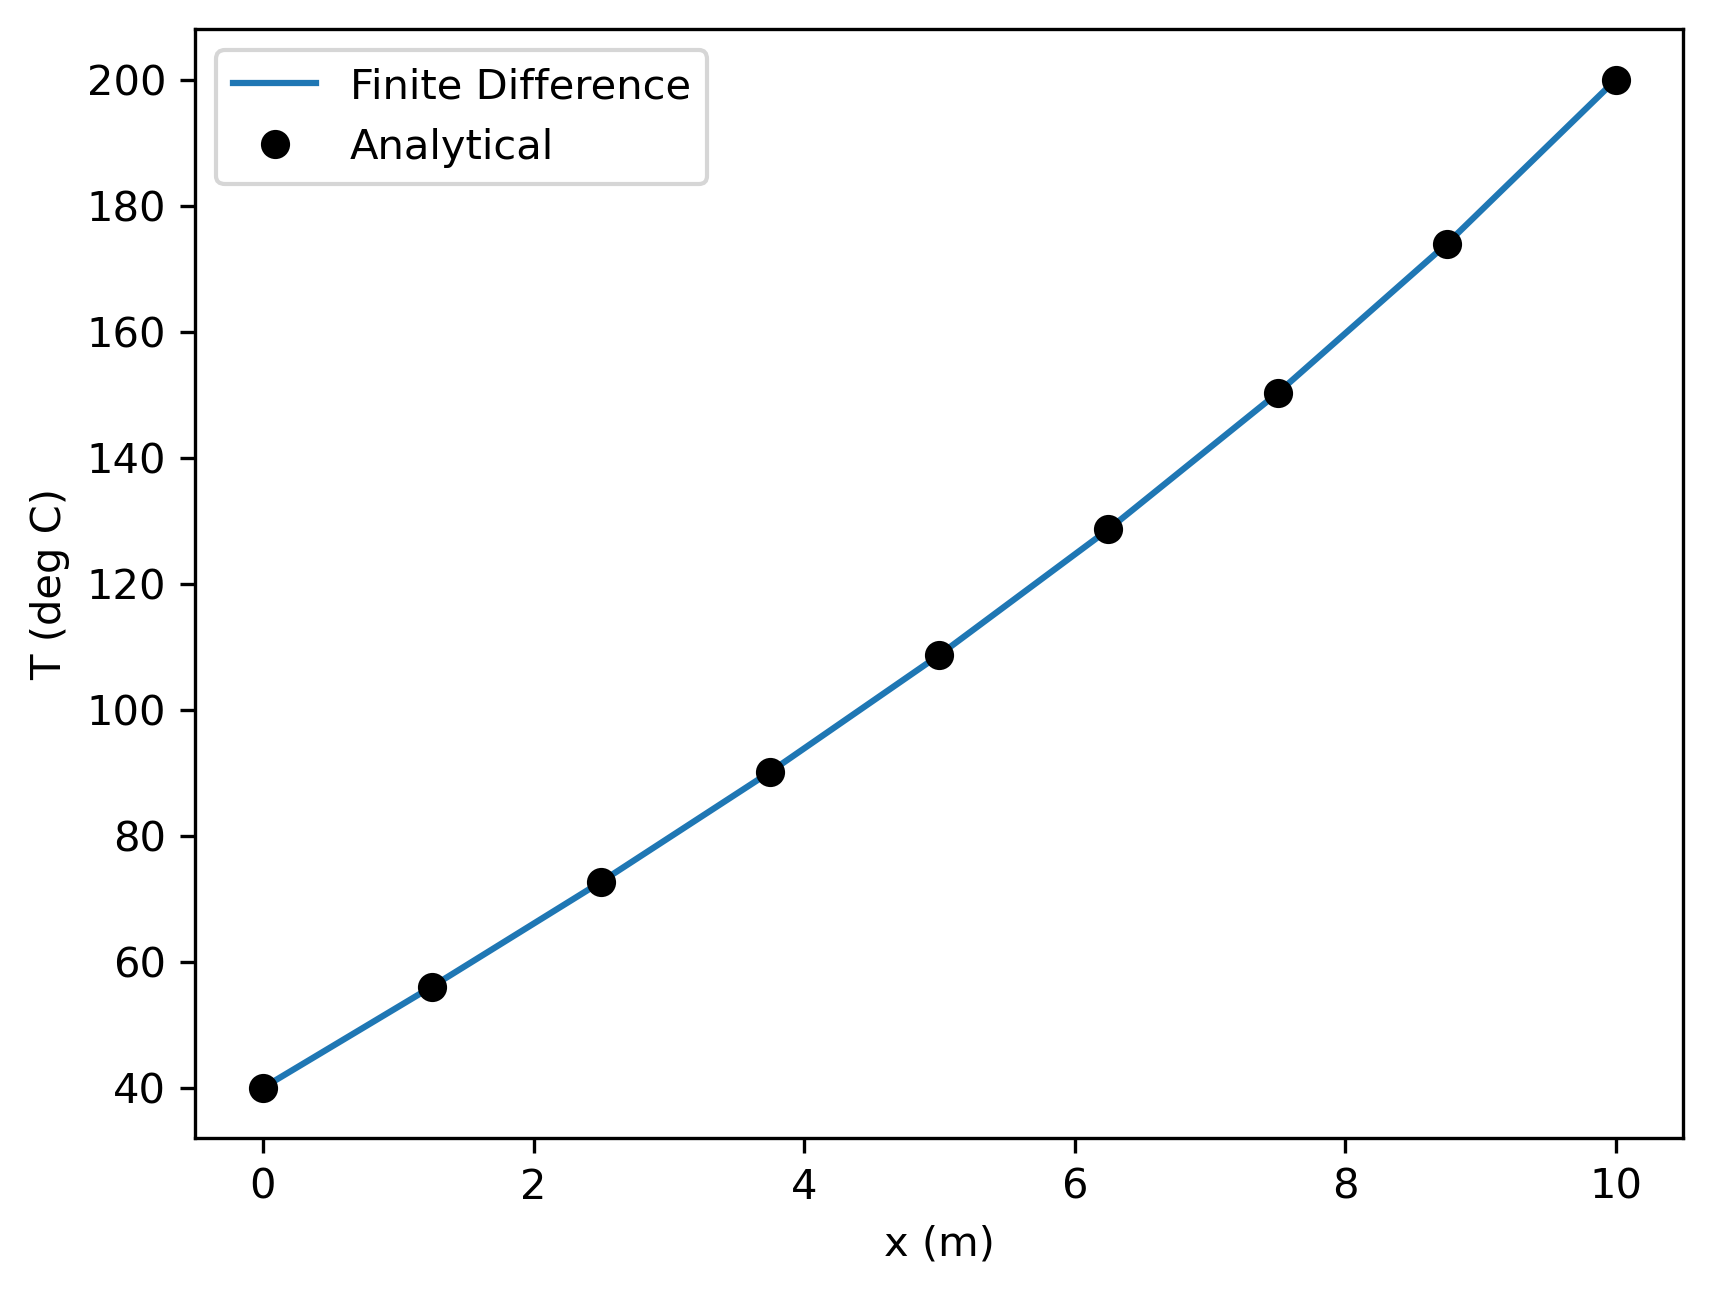

In [5]:
T = np.linalg.solve(A,b) # solve for internal nodes
T = np.concatenate(([T0], T, [TL])) # append BCs
x = np.arange(0,L+dx,dx)
T_analytical = 73.4523*np.exp(0.1*x) - 53.4523*np.exp(-0.1*x) + 20
plt.plot(x, T)
plt.plot(x, T_analytical, 'ok')
plt.xlabel('x (m)')
plt.ylabel('T (deg C)')
plt.legend(['Finite Difference', 'Analytical'])
plt.show()

##### 1-D Axially loaded column BVP: C&C Example 27.5

$$\frac{d^2 y}{dx^2} + p^2 y = 0,   \space\space\space y(0) = y(L) = 0$$

where $p^2 = \frac{P}{EI}$.

- `P`: axial load, N
- `E`: modulus of elasticity, $10 \times 10^{9}$ Pa
- `I`: moment of inertia of the cross-section, $1.25 \times 10^{-5}$ m$^4$
- `L`: length, 3 m


In [6]:
E = 10 * 10**9 # Pa
I = 1.25 * 10**-5 # m^4
L = 3 # m

In [7]:
n = 3 # number of internal nodes
dx = L / (n+1)

Use a finite difference approach to estimate the eigenvalues of this matrix. 
<div>
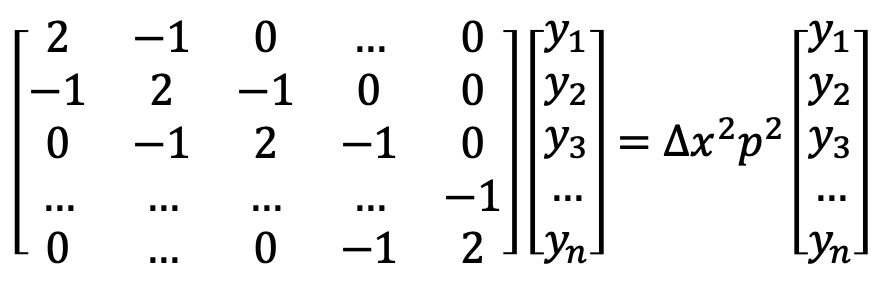
</div>
The values we find will be $\lambda = \Delta x^2 p^2$. Report the answer in terms of $p$ and compare to known values $p = \frac{n\pi}{L}, n=1,2,3...$

In [8]:
# LHS matrix
main = (2) * np.ones(n) # main diagonal
off1 = -1 * np.ones(n-1) # off-diagonals have n-1 elements
A = np.diag(main) + np.diag(off1,-1) + np.diag(off1, 1)
print(A)

[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]


In [9]:
# function to find largest eigenvalue of matrix A
def power_method(A):
    x = np.ones(n)
    for i in range(10): # could also loop until norm < tol
        x = A @ x
        l1 = np.max(np.abs(x))
        x /= l1
    return l1,x # eigenvalue, eigenvector

For this problem, we are interested in applying the power method to $\mathbf{A}^{-1}$ to obtain the smallest eigenvalue (which is the largest value of $1/\lambda_1$).

In [10]:
l1,v = power_method(np.linalg.inv(A))
print('lambda = ', 1/l1)
print('p = ', np.sqrt(1/l1 / dx**2))
print('v=', x)

lambda =  0.5857864268998645
p =  1.0204891436298702
v= [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]


From Table 27.5, the true value is $p=\pi/L = 1.0472$. This approximation has a relative error of about 2.5%. This value of $p$ leads to a critical load of $P = p^2 EI$.

In [11]:
rel_error = (np.pi/L - np.sqrt(1/l1 / dx**2)) / (np.pi/L)
print(rel_error)

0.025504650518145912


In [12]:
P_crit = np.sqrt(1/l1 / dx**2)**2 * E * I
print('P_crit = ', P_crit/1000, ' kN')

P_crit =  130.17476153330324  kN


Last, we can use built-in `np.linalg.eig` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)) to estimate all eigenvalues.

In [13]:
l,v = np.linalg.eig(A)
p = np.sqrt(l / dx**2)
print(p)

[2.46367875 1.88561808 1.02048915]


We can get more eigenvalues by increasing the size of the number of nodes $n$ in the finite difference approximation. The values are not guaranteed to be sorted, so we could find the smallest value using `p.min()` instead of the last array value.